### 3.6.0 

In [3]:
# Iris Dataset Import 
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

X = iris.data[:,[2,3]]
y = iris.target

print('Class labels:', np.unique(y))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.3, random_state=1, stratify=y)




from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# combine train_std with test_std
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

from _tools import plot_decision_regions 
                   

Class labels: [0 1 2]


### 3.6.1 Information gain
    1. Gini impurity
    2. Entropy
    3. Classification error

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Gini impurity
def gini(p):
    return (p)*(1-(p)) + (1 - p)*(1-(1-p))

# 2. Entropy
def entropy(p):
    return - p*np.log2(p) - (1-p)*np.log2((1-p))

# 3. Classification error
def error(p):
    return 1 - np.max([p, 1 -p])


In [5]:
x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)

for i , lab, ls, c, in zip([ent, sc_ent,gini(x), err], \
                            ['Entropy','Entropy(scaled)', \
                             'Gini Impurity', 'Misclassification Error'], \
                          ['-','-','--','-'], \
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2,color=c)

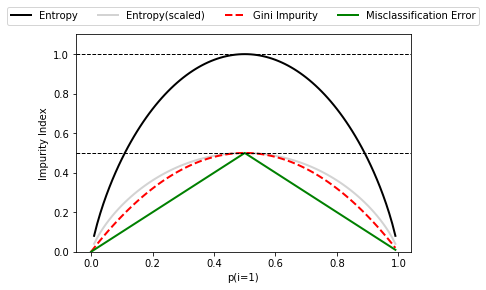

In [6]:
# 凡例の設定
ax.legend(loc='upper center', bbox_to_anchor=(0.5,1.15), \
         ncol=5, fancybox=True, shadow=False)

# 2本の水平波線を引く
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--' )
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--' )

# 横軸の下限上限
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

### 3.6.2 

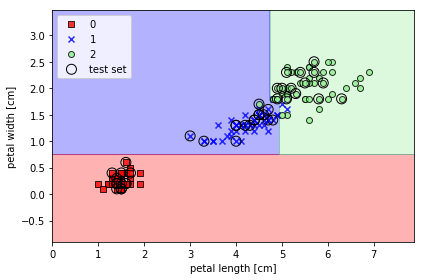

In [7]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree,
                     test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [25]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree,\
                          filled=True, \
                          rounded=True, \
                          class_names=['setosa','Versicolor','Virginica'],
                          feature_names=['petal length','petal width'],
                          out_file=None)
graph = graph_from_dot_data(dot_data)

# https://qiita.com/sh_tech_/items/8d3279c63fa98b21f879
# エラー発生 メソッドが見つからない
#graph.write_png('tree.png')

### 3.6.3 Random forest

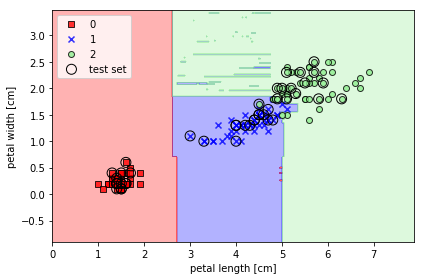

In [30]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                               n_estimators=25, random_state=1,n_jobs=2)

forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest,
                     test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



### 3.7 K-nearest  heighbor classifier

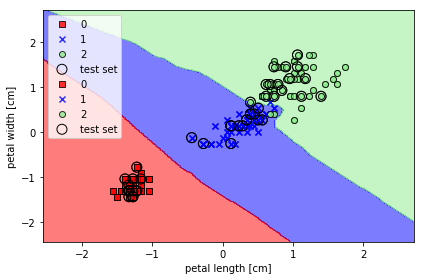

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, \
                     test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
